# Exploration in Biomedical Image Analysis
> Prepare to conquer the Nth dimension! To begin the course, you'll learn how to load, build and navigate N-dimensional images using a CT image of the human chest. You'll also leverage the useful ImageIO package and hone your NumPy and matplotlib skills. This is the Summary of lecture "Biomedical Image Analysis in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Deep_Learning, Vision]
- image: 

In [16]:
import numpy as np
import scipy
import imageio
import matplotlib.pyplot as plt
from pprint import pprint

plt.rcParams['figure.figsize'] = (10, 8)

## Image data


### Load images
In this chapter, we'll work with sections of a [computed tomography (CT) scan](https://en.wikipedia.org/wiki/CT_scan) from [The Cancer Imaging Archive](http://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/). CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the `imageio` package to load a single DICOM image from the scan volume and check out a few of its attributes.

In [17]:
# Load "chest-220.dcm"
im = imageio.imread('./dataset/tcia-chest-ct-sample/chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_45128\1700126444.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('./dataset/tcia-chest-ct-sample/chest-220.dcm')


`imageio` is a versatile package. It can read in a variety of image data, including JPEG, PNG, and TIFF. But it's especially useful for its ability to handle DICOM files.

### Metadata
ImageIO reads in data as `Image` objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

- Patient demographics: name, age, sex, clinical information
- Acquisition information: image shape, sampling rates, data type, [modality](https://en.wikipedia.org/wiki/Medical_imaging#Imaging_modalities) (such as X-Ray, CT or MRI)

Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

In [18]:
# Print the available metadata fields
pprint(im.meta)

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

In [19]:
# Import ImageIO and load image
import imageio.v2 as imageio
im = imageio.imread('./dataset/tcia-chest-ct-sample/chest-220.dcm')

# Print the available metadata fields
pprint(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


### Plot images
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's `imshow()` function gives you a simple way to do this. Knowing a few simple arguments will help:

- `cmap` controls the color mappings for each value. The "gray" colormap is common, but many others are available.
- `vmin` and `vmax` control the color contrast between values. Changing these can reduce the influence of extreme values.
- `plt.axis('off')` removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

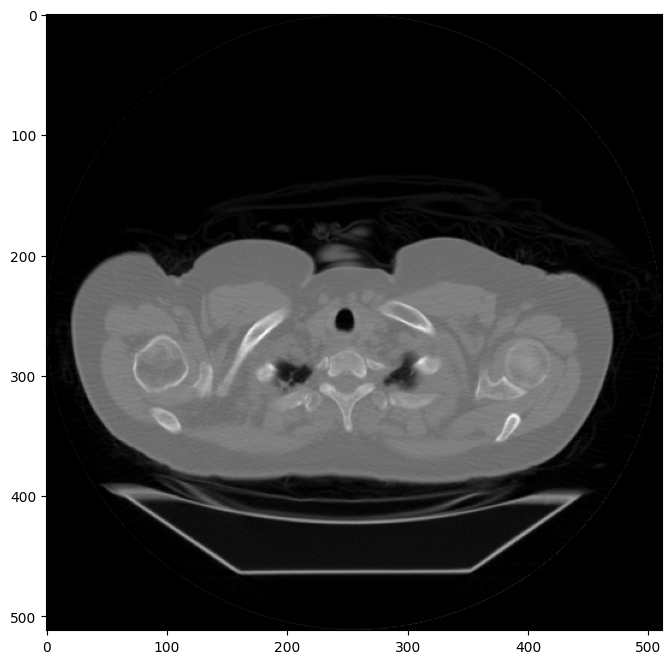

In [20]:
# Import ImageIO and PyPlot 
# import imageio
import matplotlib.pyplot as plt

# Read in "chest-220.dcm"
im = imageio.imread('./dataset/tcia-chest-ct-sample/chest-220.dcm')
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

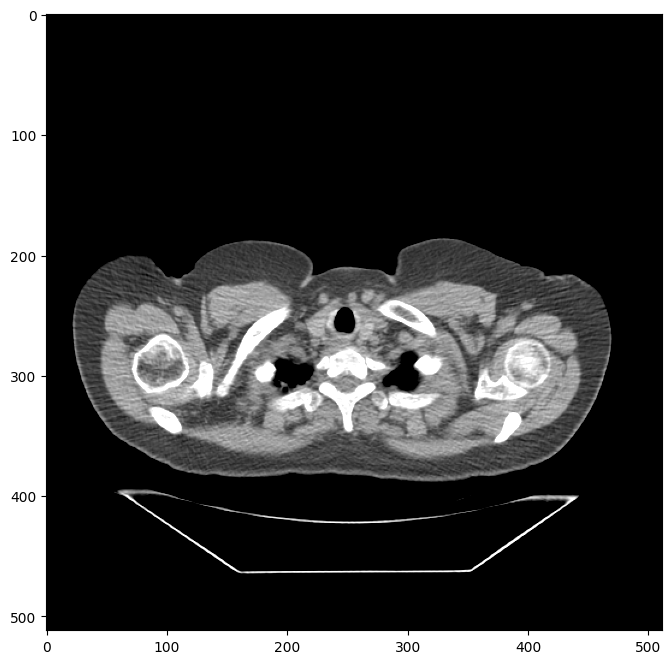

In [21]:
# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)

# Render the image
plt.show()

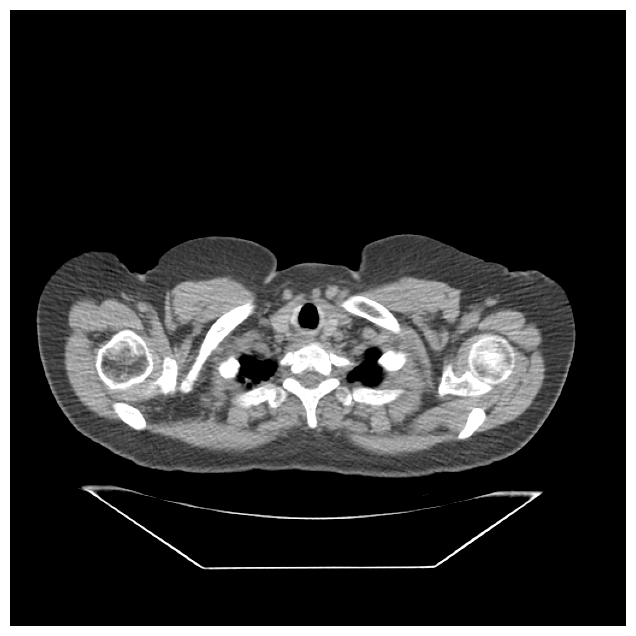

In [22]:
# Remove axis ticks and labels
# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)

plt.axis('off')

# Render the image
plt.show()

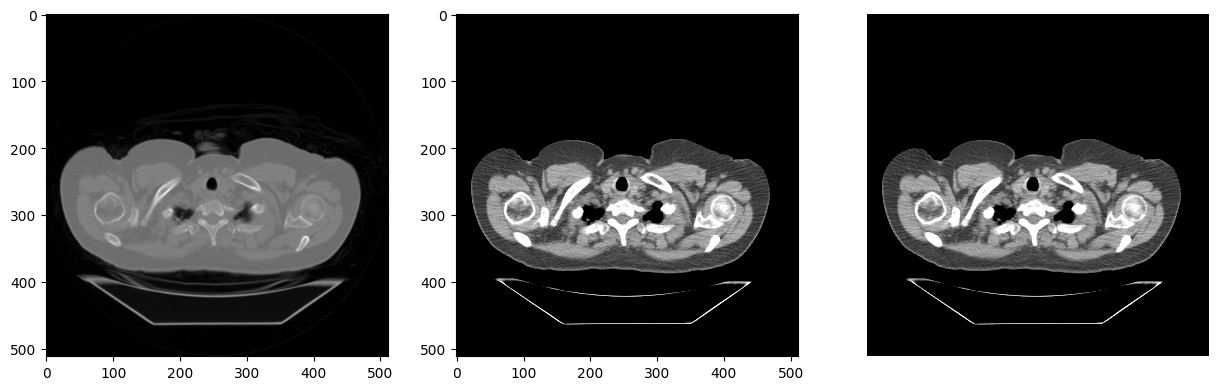

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(im, cmap='gray');

# Draw the image with greater contrast
ax[1].imshow(im, cmap='gray', vmin=-200, vmax=200);

# Remove axis ticks and labels
ax[2].imshow(im, cmap='gray', vmin=-200, vmax=200);
ax[2].axis('off');

## N-dimensional images
- Shape, sampling and field of view
    - Image shape: number of elements along each axis
    - Sampling rate: physical space covered by each element
    - Field of view: physical space covered along each axis

### Stack images
Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

![stacks](image/Ch1_L2_Stacks4D.PNG)

In this exercise, we will use NumPy's `stack()` function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: `vol[plane, row, col]`.

Note: performing any operations on an ImageIO `Image` object will convert it to a `numpy.ndarray`, stripping its metadata.



http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-images-coordinate-conventions

In [24]:
# Read in each 2D image
im1 = imageio.imread('./dataset/tcia-chest-ct-sample/chest-220.dcm')
im2 = imageio.imread('./dataset/tcia-chest-ct-sample/chest-221.dcm')
im3 = imageio.imread('./dataset/tcia-chest-ct-sample/chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


### Load volumes
ImageIO's `volread()` function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the "./dataset/tcia-chest-ct-sample" folder, which contains 5 DICOM images.

In [27]:
import imageio

# Load the "tcia-chest-ct" directory containing DICOM files
vol = imageio.volread('./dataset/tcia-chest-ct-sample/', format='DICOM', plugin='DICOM')

# Print image attributes
print('Available metadata:', vol.meta.keys())

TypeError: DicomFormat.Reader._open() got an unexpected keyword argument 'plugin'

In [25]:
# Load the "tcia-chest-ct" directory
vol = imageio.volread('./dataset/tcia-chest-ct-sample/')

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

ValueError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

### Field of view
The amount of physical space covered by an image is its field of view, which is calculated from two properties:

- Array shape, the number of data elements on each axis. Can be accessed with the `shape` attribute.
- Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., `meta['sampling']`).


## Advanced plotting
- To plot N-dimensional data, slice it!
- Non-standard views
    - Axial (Plain)
    - Coronal (Row)
    - sagittal (Col)

### Generate subplots
You can draw multiple images in one figure to explore data quickly. Use `plt.subplots()` to generate an array of subplots.
```python
fig, axes = plt.subplots(nrows=2, ncols=2)
```
![subplot](image/Ch1_L3_Fig.png)

To draw an image on a subplot, call the plotting method directly from the subplot object rather than through PyPlot: `axes[0,0].imshow(im)` rather than `plt.imshow(im)`.

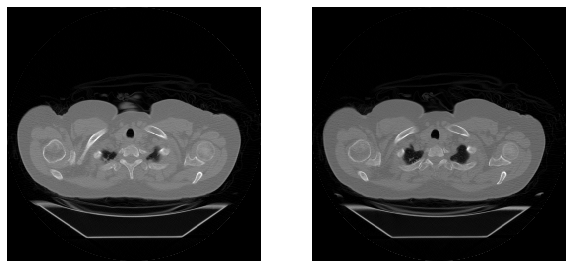

In [ ]:
# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=1, ncols=2)

# Draw an images on each subplot
axes[0].imshow(im1, cmap='gray');
axes[1].imshow(im2, cmap='gray');

# Remove ticks/labels and render
axes[0].axis('off');
axes[1].axis('off');

NameError: name 'im1' is not defined

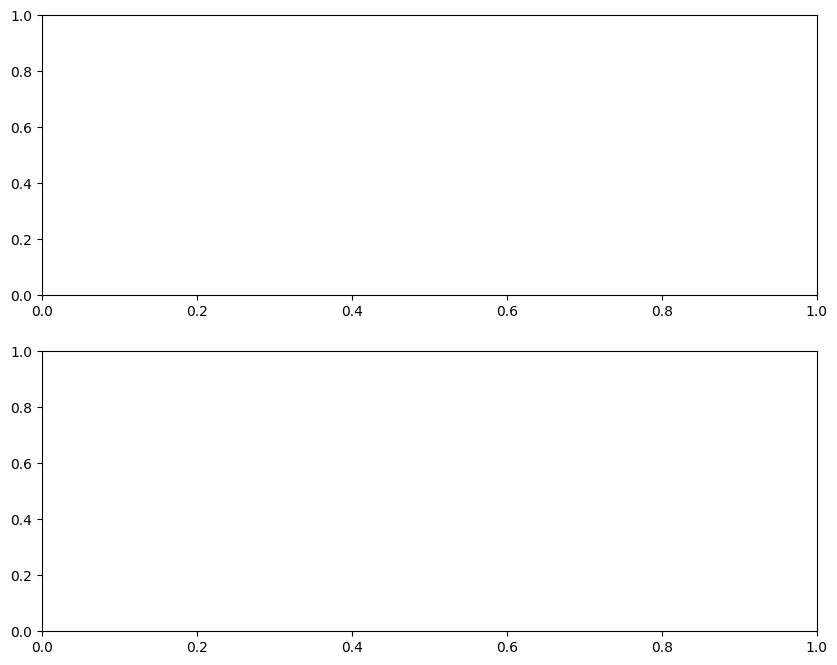

In [ ]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

### Slice 3D images
The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.

![axial](image/Ch1_L3_Axial16x9.gif)

To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: `vol[0, :, :]`

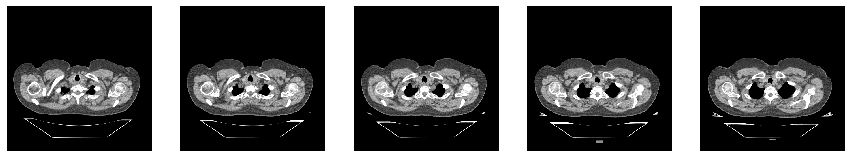

In [ ]:
# Plot the images on a subplots array
fig, axes = plt.subplots(1, 5, figsize=(15, 10))

# Loop through subplots and draw image
for ii in range(5):
    im = vol[ii, :, :]
    axes[ii].imshow(im, cmap='gray', vmin=-200, vmax=200)
    axes[ii].axis('off')

In [ ]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii * 40, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

### Plot other views
Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images.

![sampling](image/Ch1_L3_Shape-Sampling.PNG)

Changing the aspect ratio can address this by increasing the width of one of the dimensions.

For this exercise, plot images that slice along the second and third dimensions of vol. Explicitly set the aspect ratio to generate undistorted images.

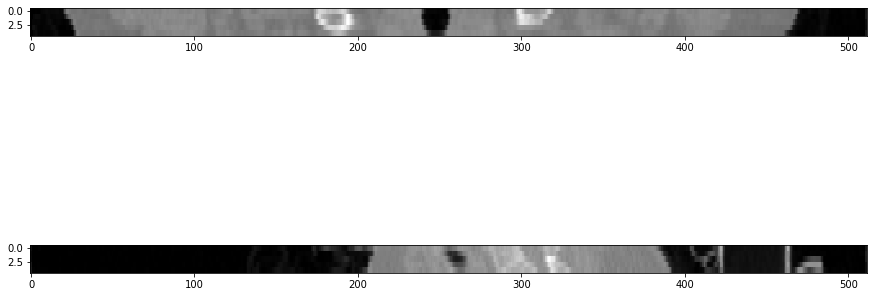

In [ ]:
# Select frame frol "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].imshow(im1, cmap='gray', aspect=asp1);
axes[1].imshow(im2, cmap='gray', aspect=asp2);
plt.show()